# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png)

##  Project Capstone

### Reducing Electricity Costs in Romania: Predictive and Reinforcement Learning for Solar Battery Optimization

---

[README](../README.md) | [Part 1: Cleaning](01_Cleaning.ipynb) | **Part 2: EDA** | [Part 3: Solar Energy Prediction Models](03_Model_Solar_Energy.ipynb) | [Part 4: Electricity Cost Prediction Models](04_Model_Electricity_Cost.ipynb) | [Part 5: Electricity Cost Prediction Using Time Series Models](05_Model_Electricity_Cost_ts.ipynb) | [Part 6: Solar Battery Optimization](06_Reinforcement_Learning.ipynb)

---

### Introduction
- This analysis use the [electricity_romania.csv](../data/cleaned/electricity_romania.csv) file, which has been cleaned in [Part 1: Cleaning](01_Cleaning.ipynb).
- The exploratory data analysis is divided into three parts:
  - Exploring general information
  - Examining the relationship between weather conditions and solar energy.
  - Investigating the relationship between electricity production and electricity cost per hour.

### Import and Preprocessing

#### Essential Libraries

In [1]:
import pandas as pd
import seaborn as sns

colord = sns.color_palette('Set3')                        # Set color for discrete values
colorc = sns.color_palette('Spectral', as_cmap = True)    # Set color for continuous values

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#### Import Data

In [2]:
df = pd.read_csv('../data/cleaned/electricity_romania.csv')       # Import
df['datetime'] = pd.to_datetime(df['datetime'])                   # Formatting `datetime`
df['month'] = df['datetime'].dt.month                             # Extract month
df['hour'] = df['datetime'].dt.hour                               # Extract hour

In [3]:
df.head(1)

,datetime,temp,feelslike,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,...,production,nuclear,wind,hydroelectric,oil_gas,coal,solar,biomass,month,hour
0,2024-01-01,3.4,3.4,2.9,96.47,6.1,3.7,19.0,1018.1,0.0,...,6223,1396,1115,1409,1434,837,0,31,1,0


In [4]:
df.columns

Index(['datetime', 'temp', 'feelslike', 'dew', 'humidity', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'has_snow', 'has_solarradiation', 'icon_cloudy', 'icon_fog',
       'icon_partly_cloudy', 'icon_rain', 'icon_snow', 'ckwh', 'consumption',
       'production', 'nuclear', 'wind', 'hydroelectric', 'oil_gas', 'coal',
       'solar', 'biomass', 'month', 'hour'],
      dtype='object')

### Exploratory Data Analysis

#### General Information
- **Weather Conditions**
    - The weather in Romania displays a significant range, with average temperatures around $6^\circ C$, although they can drop to $-9.9^\circ C$ and rise up to $26.4^\circ C$.
    - Humidity levels are generally high, averaging $74\%$, indicating a releatively humid environment.
    - Wind conditions vary considerably, with average wind gusts arounds $17.4$ kilometers per hour and reaching up to $54.7$ kilometers per hour.
    - Overall, Romania experiences a wide variety of weather conditions, with notable fluctuations in temperature, humidity, and wind gusts througout the first quarter of the year.
- **Electricity Production**
  - The three primary sources of electricity in Romania are hydro electric, producing $2,035$ Megawatts per hour, oil and gas, generating $1,605$ Megawatts per hour, and nuclear, contributing $1,378$ Megawatts per hour.
  - Solar power is not a main source of electricity, producing around $150$ Megawatts per hour and is only available during daylight hours, typically between 7AM and 6PM.

In [5]:
weather_cols = ['temp'
                , 'feelslike'
                , 'dew'
                , 'humidity'
                , 'windgust'
                , 'windspeed'
                , 'winddir'
                , 'sealevelpressure'
                , 'cloudcover'
                , 'visibility'
               ]

df[weather_cols].describe()

,temp,feelslike,dew,humidity,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,6.003148,5.296898,1.332685,74.435361,17.420278,5.912269,167.724907,1017.505833,65.341898,13.542176
std,5.912228,6.443258,4.239536,16.504433,9.645693,3.913286,92.587738,8.822830,38.197001,6.073828
min,-9.900000,-11.100000,-11.600000,24.650000,0.700000,0.000000,2.000000,998.800000,0.000000,0.000000
25%,2.600000,1.875000,-0.900000,63.305000,9.700000,3.600000,61.000000,1011.800000,31.700000,9.900000
50%,6.100000,5.200000,2.000000,77.280000,16.200000,4.200000,212.000000,1016.700000,83.750000,14.000000
75%,9.600000,9.200000,4.300000,88.047500,23.000000,7.500000,231.250000,1022.100000,100.000000,20.000000
max,26.400000,26.400000,11.400000,99.180000,54.700000,31.400000,359.000000,1042.500000,100.000000,20.000000


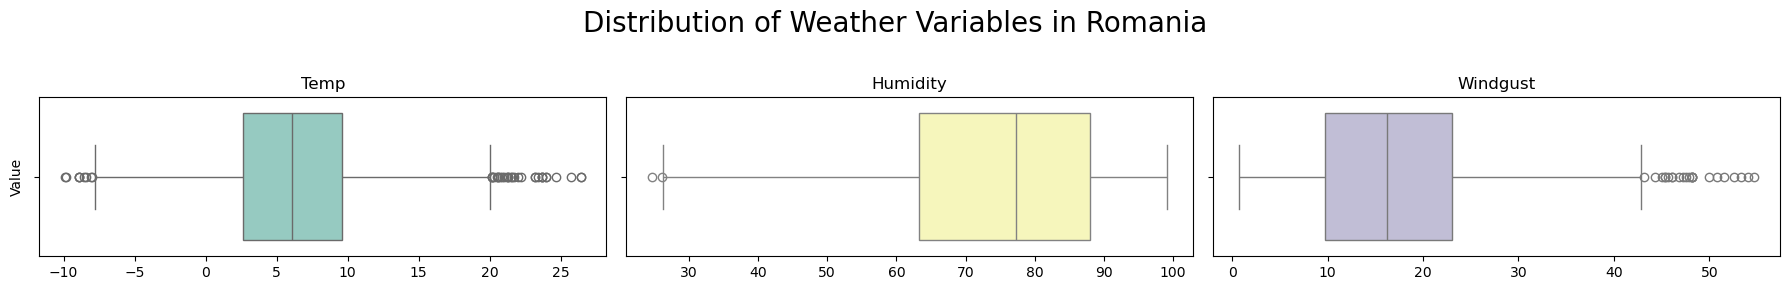

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color palette

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 3))
fig.suptitle('Distribution of Weather Variables in Romania', fontsize=20)

for i, col in enumerate(['temp', 'humidity', 'windgust']):
    sns.boxplot(data = df[col], ax = axes[i], color = colord[i], orient = 'h')
    axes[i].set_title(col.capitalize())
    axes[0].set_ylabel('Value')
    axes[i].set_xlabel('')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../image/weather_box.png', dpi = 300, bbox_inches = 'tight')
plt.show();

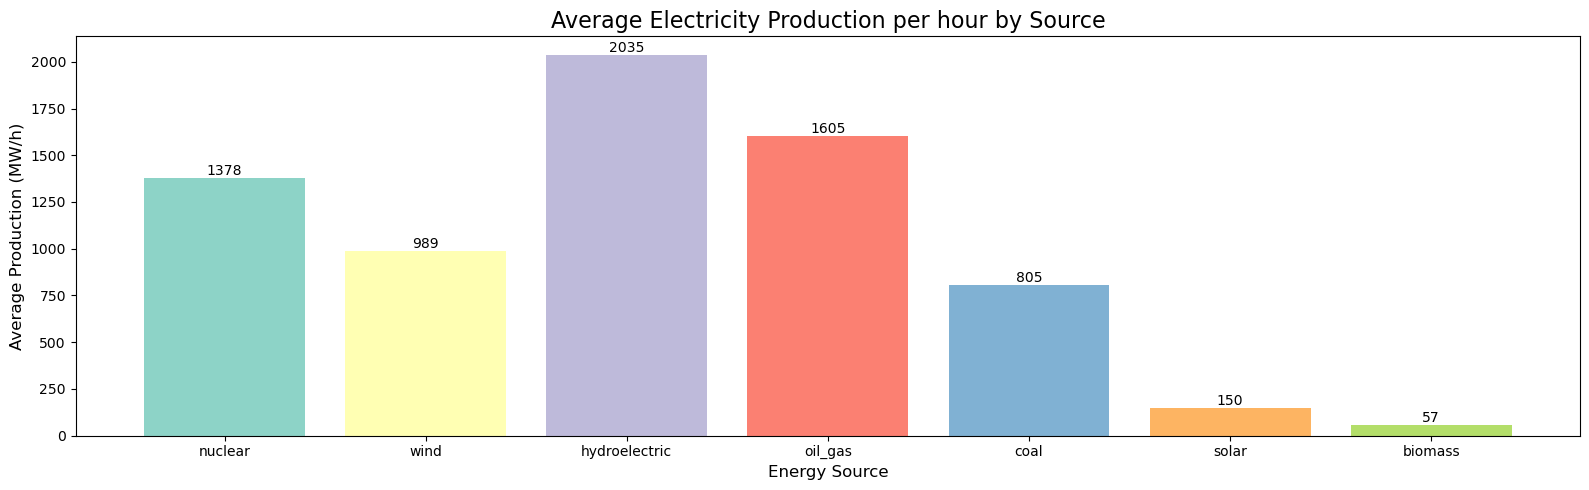

In [7]:
energy_sources = ['nuclear', 'wind', 'hydroelectric', 'oil_gas', 'coal', 'solar', 'biomass']
average_production = df[energy_sources].mean()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(16, 5))
bars = ax.bar(average_production.index
              , average_production.values
              , color = colord
             )

# Add labels to each bar
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, height,
        f'{height:.0f}', ha = 'center', va = 'bottom', fontsize = 10
    )

# Customize the plot
plt.title('Average Electricity Production per hour by Source', fontsize = 16)
plt.xlabel('Energy Source', fontsize = 12)
plt.ylabel('Average Production (MW/h)', fontsize = 12)
plt.xticks(rotation=0, fontsize = 10)
plt.tight_layout()
plt.savefig('../image/avg_energy.png', dpi = 300, bbox_inches = 'tight')
plt.show();

#### Relationship between Weather and Solar Energy
- Solar energy values exhibit a normal distribution throughout the day, spanning from 7:00 AM to 6:00 PM, with peak production around noon. Over the months, there is a noticeable increase in solar power generation, particularly from January to March.
- According to the correlation matrix, temperature and wind show a positive relationship with solar power, while humidity shows a negative relationship.
- In general, higher temperatures are associated with lower humidity and stronger wind gusts. This relationship is supported by the correlation matrix which shows a clear negative correlation betweenn temperature and humidity, and a positive correlation between temperature and wind gusts.

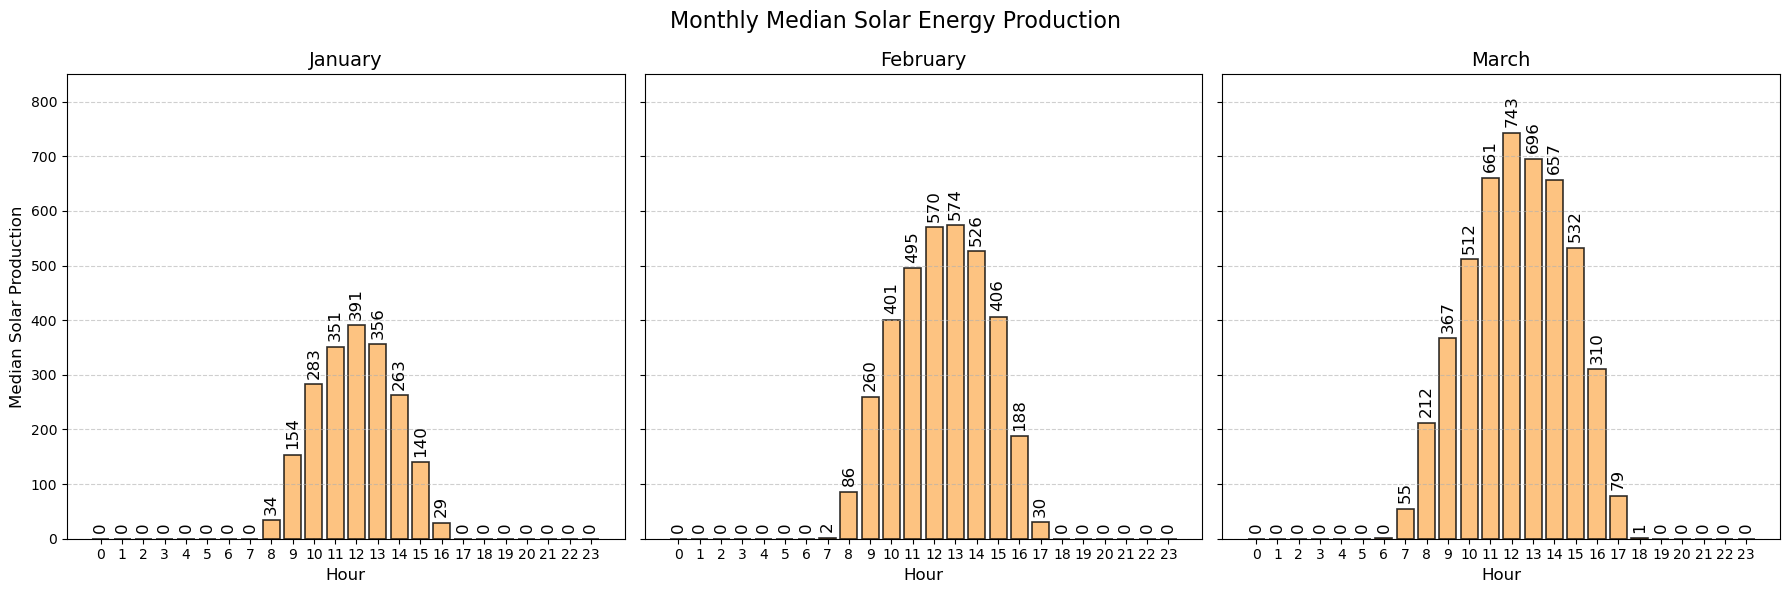

In [8]:
# Explore Solar Energy by month and hour

# Calculate the median solar energy by month and hour
sbmh = df.groupby(['month', 'hour'])['solar'].median()

# Define months as a dictionary (month number: month name)
month_dict = {1: 'January', 2: 'February', 3: 'March'}

# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Loop through each month to create a subplot
for i, (month_num, month_name) in enumerate(month_dict.items()):
    
    bars = axes[i].bar(sbmh.loc[month_num].index
                       , sbmh.loc[month_num].values
                       , color = colord[5]
                       , alpha = 0.8
                       , edgecolor = 'black'
                       , linewidth = 1.2
                      )

    # Add labels on top of each bar
    for bar in bars:
        axes[i].text(bar.get_x() + bar.get_width() / 2
                     , bar.get_height() + 10
                     , f'{bar.get_height():.0f}'
                     , ha = 'center'
                     , va = 'bottom'
                     , fontsize = 12
                     , rotation = 90
                    )

    axes[i].set_title(f'{month_name}', fontsize = 14)
    axes[i].set_xlabel('Hour', fontsize = 12)
    axes[0].set_ylabel('Median Solar Production', fontsize = 12)
    axes[i].set_xticks(range(0, 24))
    axes[i].grid(axis = 'y', linestyle = '--', alpha = 0.6)
    axes[i].set_ylim(0, 850)

fig.suptitle('Monthly Median Solar Energy Production', fontsize = 16)
# Adjust layout
plt.tight_layout()
# Save
plt.savefig('../image/solar_by_hour.png', dpi = 300, bbox_inches = 'tight')
# Show the plot
plt.show();

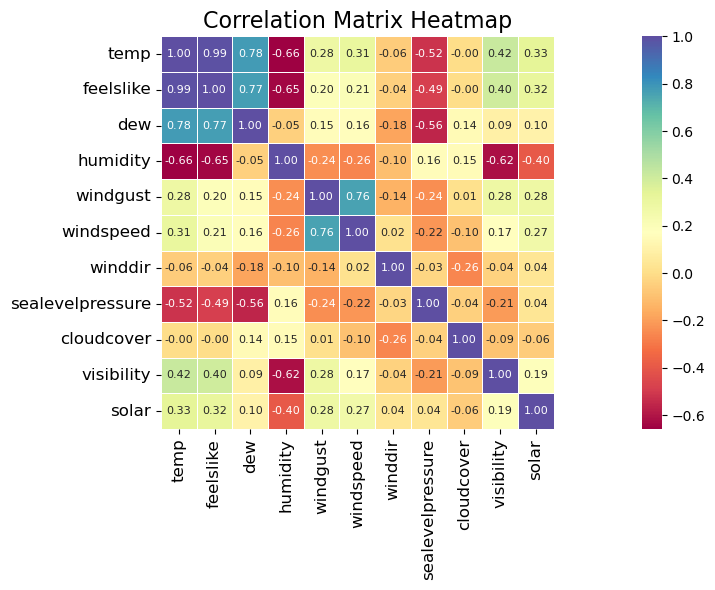

In [9]:
# Correlation Matrix

weather_cols = ['temp'
                , 'feelslike'
                , 'dew'
                , 'humidity'
                , 'windgust'
                , 'windspeed'
                , 'winddir'
                , 'sealevelpressure'
                , 'cloudcover'
                , 'visibility'
                , 'solar'
               ]

# Compute the correlation matrix
correlation_matrix = df[weather_cols].corr()

# Plot
plt.figure(figsize=(18, 6))

# Create the heatmap
sns.heatmap(correlation_matrix
            , annot = True
            , fmt = '.2f'
            , cmap = colorc
            , cbar = True
            , square = True
            , linewidths = 0.5
            , yticklabels = True
            , annot_kws = {'size':8}
           )

# Add title
plt.title('Correlation Matrix Heatmap', fontsize = 16)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
# Adjust layout
plt.tight_layout()
# Save
plt.savefig('../image/solar_heatmap.png', dpi = 300, bbox_inches = 'tight')
# Show the plot
plt.show();

In [10]:
# Scale column to check relationship
scale_columns = ['temp','humidity','windgust']               # Columns having significant relationship to solar       



sc = StandardScaler()       # Instantiate StandardScaler()

df_scale = pd.DataFrame(sc.fit_transform(df[scale_columns])          # Scale the selected column
                        , columns = scale_columns
                       )                                             # Convert the resulted array to DataFrame
df_scale = pd.concat([df[['datetime','month', 'hour', 'solar']], df_scale]
                     , axis = 1
                    )                                                # Concatenate the original column to df_scale

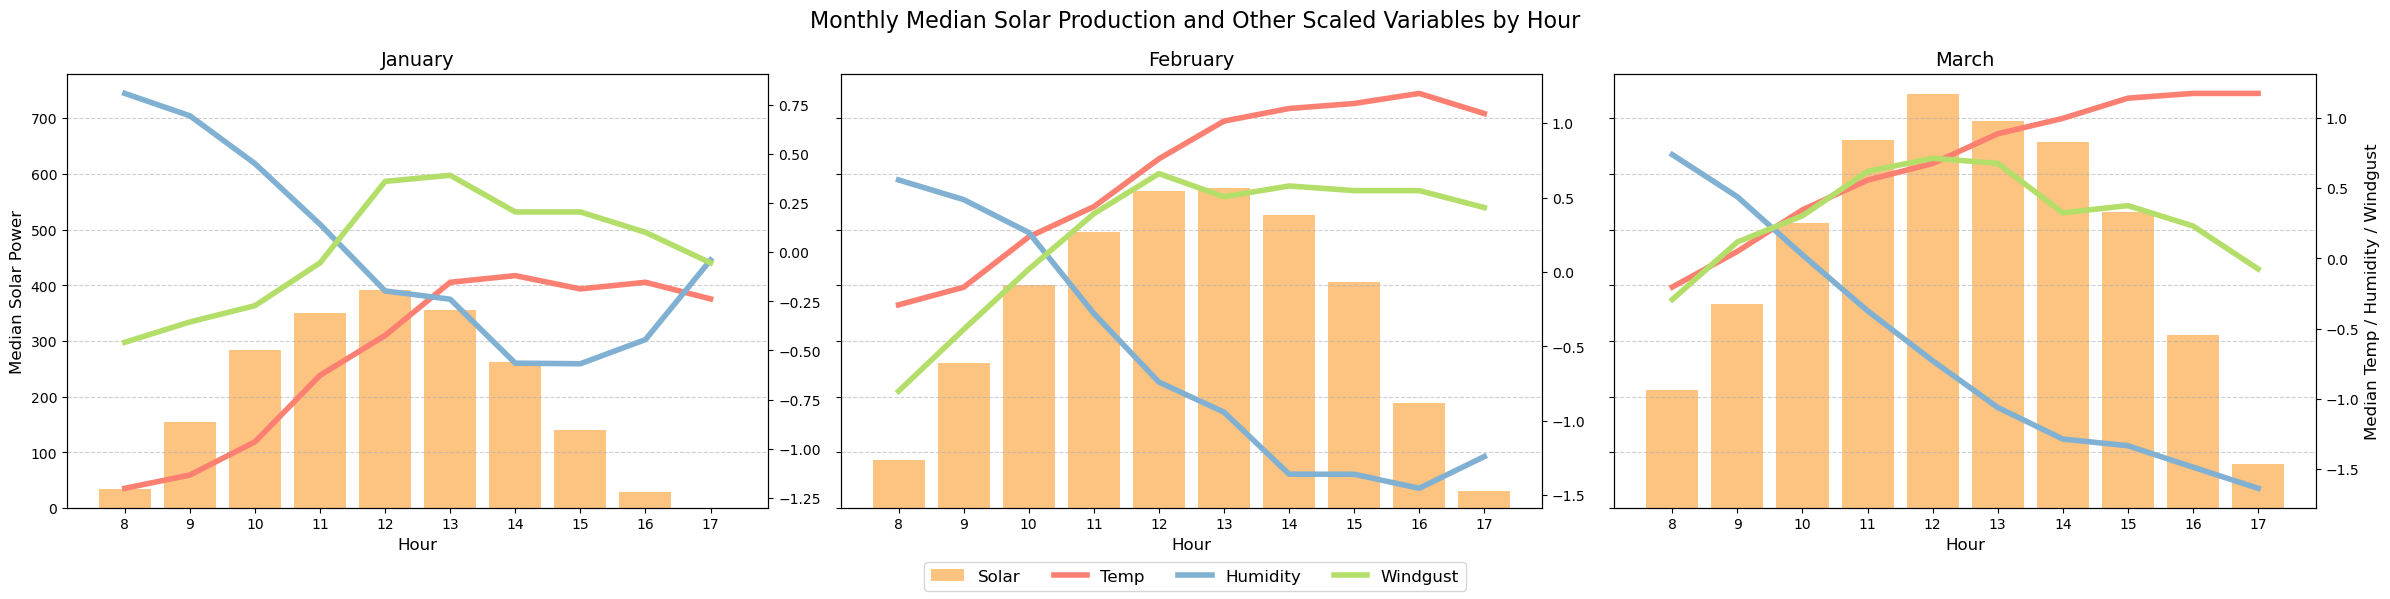

In [11]:
# Filter df_scale to include only hours between 7 and 18
df_scale = df_scale[(df_scale['hour'] >= 8) & (df_scale['hour'] <= 17)]

# Calculate the median by month and hour
sbh_sc = df_scale.groupby(['month', 'hour'])['solar'].median()
tbh_sc = df_scale.groupby(['month', 'hour'])['temp'].median()
hum_sc = df_scale.groupby(['month', 'hour'])['humidity'].median()
wdg_sc = df_scale.groupby(['month', 'hour'])['windgust'].median()

# Define the months for the subplots
month_dict = {1: 'January', 2: 'February', 3: 'March'}

# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(24, 6), sharey=True)

# Loop through each month to create a subplot
for i, (month_num, month_name) in enumerate(month_dict.items()):
    # Filter data for the specific month
    solar_by_hour = sbh_sc.loc[month_num].values
    temp_by_hour = tbh_sc.loc[month_num].values
    hum_by_hour = hum_sc.loc[month_num].values
    wdg_by_hour = wdg_sc.loc[month_num].values
    
    hours = sbh_sc.loc[month_num].index
    
    # Plot the bar chart for median solar production
    solar_bars = axes[i].bar(hours, solar_by_hour, color = colord[5], alpha = 0.8, label = 'Solar')
    axes[i].set_title(month_name, fontsize = 14)
    axes[i].set_xlabel('Hour', fontsize = 12)
    if i == 0:
        axes[i].set_ylabel('Median Solar Power', fontsize = 12)
    axes[i].set_xticks(range(7, 19))
    axes[i].grid(axis = 'y', linestyle = '--', alpha = 0.6)
    
    # Create the second y-axis to plot the other variables
    ax2 = axes[i].twinx()
    temp_line, = ax2.plot(hours, temp_by_hour, color = colord[3], label = 'Temp', linewidth = 4)
    hum_line, = ax2.plot(hours, hum_by_hour, color = colord[4], label = 'Humidity', linewidth = 4)
    wdg_line, = ax2.plot(hours, wdg_by_hour, color = colord[6], label = 'Windgust', linewidth = 4)
    if i == len(month_dict) - 1:
        ax2.set_ylabel('Median Temp / Humidity / Windgust', fontsize = 12)

# Legend
lines = [solar_bars, temp_line, hum_line, wdg_line]
labels = [line.get_label() for line in lines]
fig.legend(lines, labels, loc = 'lower center', ncol = 4, fontsize = 12)

# Title
fig.suptitle('Monthly Median Solar Production and Other Scaled Variables by Hour', fontsize = 16)

# Adjust layout
plt.tight_layout(rect=[0, 0.05, 1, 1])

# Save
plt.savefig('../image/temp_hum_wdg_solar.png', dpi = 300, bbox_inches = 'tight')

# Show the plot
plt.show()

#### Relationship between Electricity Production and Electricity Cost per Hour
- Electricity cost fluctuate based on peak hours (9-11 AM, 5-7 PM) and off-peak hours.
- According to the correlation matrix, electricity costs are positively related to energy consumption, energy production, annd the production of hydroelectric, oil and gas, and coal. However, when there is excess production, electricity costs decrease, showing a negative relationship.
- Note that, production encompasses the total output from all energy sources, effectively representinng the overall energy generatioin. Therefore, it's unnecessary to consider the contributions from individual energy sources separately.
- Additionally, production is positively correlated with many of the individual sources such as wind, hydroelectric, oil and gas, and coal, highlighting its comprehensive nature.

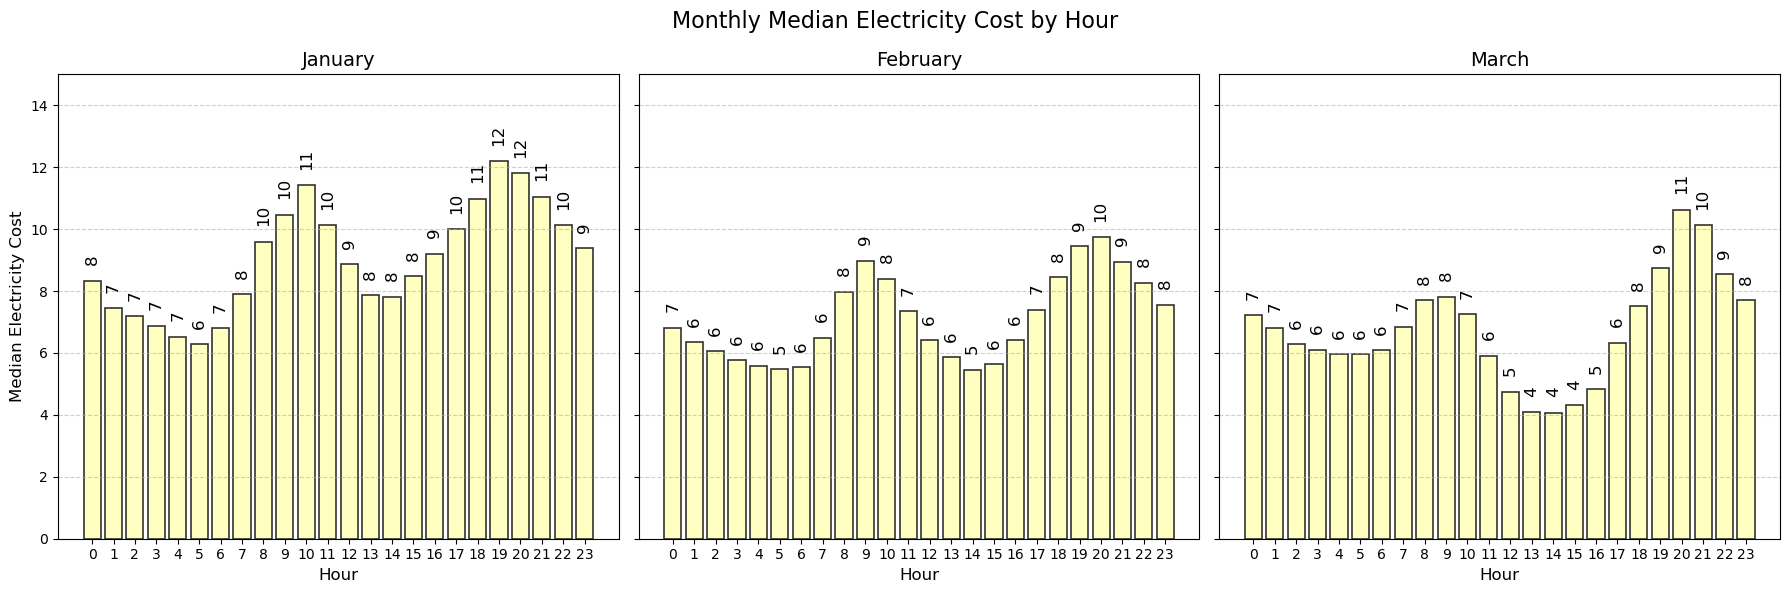

In [12]:
# Calculate the median electricity cost by month and hour
ec = df.groupby(['month', 'hour'])['ckwh'].median()

# Define months as a dictionary (month number: month name)
month_dict = {1: 'January', 2: 'February', 3: 'March'}

# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey = True)

# Loop through each month to create a subplot
for i, (month_num, month_name) in enumerate(month_dict.items()):
    # Filter data for the specific month
    hours = ec.loc[month_num].index
    values = ec.loc[month_num].values
    
    # Plot the bar chart for median electricity cost
    bars = axes[i].bar(hours
                       , values
                       , color = colord[1]
                       , alpha = 0.8
                       , edgecolor = 'black'
                       , linewidth = 1.2
                      )

    # Add labels on top of each bar
    for bar in bars:
        axes[i].text(bar.get_x() + bar.get_width() / 2,
                     bar.get_height() + 0.5,
                     f'{bar.get_height():.0f}',
                     ha='center',
                     va='bottom',
                     fontsize=12,
                     rotation=90)

    axes[i].set_title(f'{month_name}', fontsize = 14)
    axes[i].set_xlabel('Hour', fontsize = 12)
    axes[i].set_ylim(0, 15)
    if i == 0:
        axes[i].set_ylabel('Median Electricity Cost', fontsize = 12)
    axes[i].set_xticks(range(0, 24))
    axes[i].grid(axis = 'y', linestyle = '--', alpha = 0.6)

fig.suptitle('Monthly Median Electricity Cost by Hour', fontsize = 16)

# Adjust layout
plt.tight_layout()
# Save the figure
plt.savefig('../image/ec_by_hour.png', dpi = 300, bbox_inches = 'tight')
# Show the plot
plt.show();

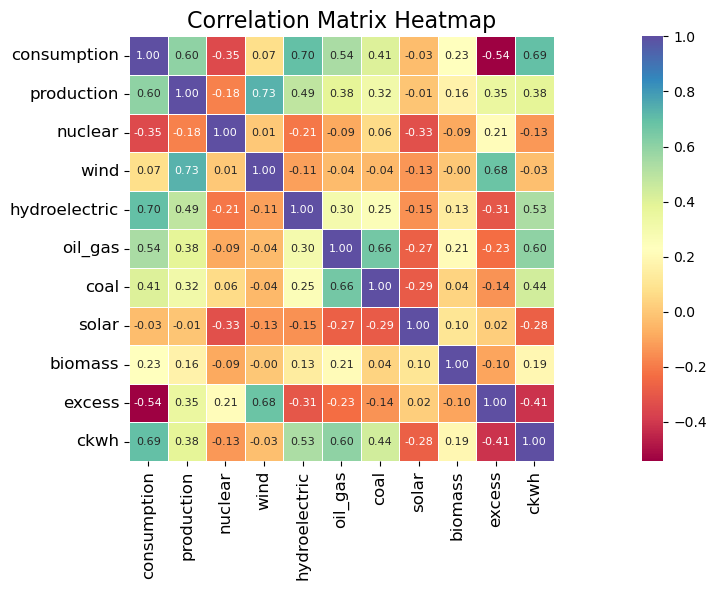

In [13]:
# Correlation Matrix
df['excess'] = df['production'] - df['consumption']
energy_cols = ['consumption'
               , 'production'
               , 'nuclear'
               , 'wind'
               , 'hydroelectric'
               , 'oil_gas'
               , 'coal'
               , 'solar'
               , 'biomass'
               , 'excess'
               , 'ckwh'
               ]

# Compute the correlation matrix
correlation_matrix = df[energy_cols].corr()

# Plot
plt.figure(figsize=(18, 6))

# Create the heatmap
sns.heatmap(correlation_matrix
            , annot = True
            , fmt = '.2f'
            , cmap = colorc
            , cbar = True
            , square = True
            , linewidths = 0.5
            , yticklabels = True
            , annot_kws = {'size':8}
           )

# Add title
plt.title('Correlation Matrix Heatmap', fontsize = 16)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
# Adjust layout
plt.tight_layout()
# Save
plt.savefig('../image/ckwh_heatmap.png', dpi = 300, bbox_inches = 'tight')
# Show the plot
plt.show();

In [14]:
scale_columns_2 = ['consumption', 'production', 'excess', 'hydroelectric', 'oil_gas', 'coal']

sc_2 = StandardScaler()

# Scale the selected columns and convert the result to DataFrame
df_scale_2 = pd.DataFrame(sc_2.fit_transform(df[scale_columns_2]), columns = scale_columns_2)

# Concatenate the scaled data with original columns
df_scale_2 = pd.concat([df[['datetime', 'month', 'hour', 'ckwh']], df_scale_2], axis = 1)

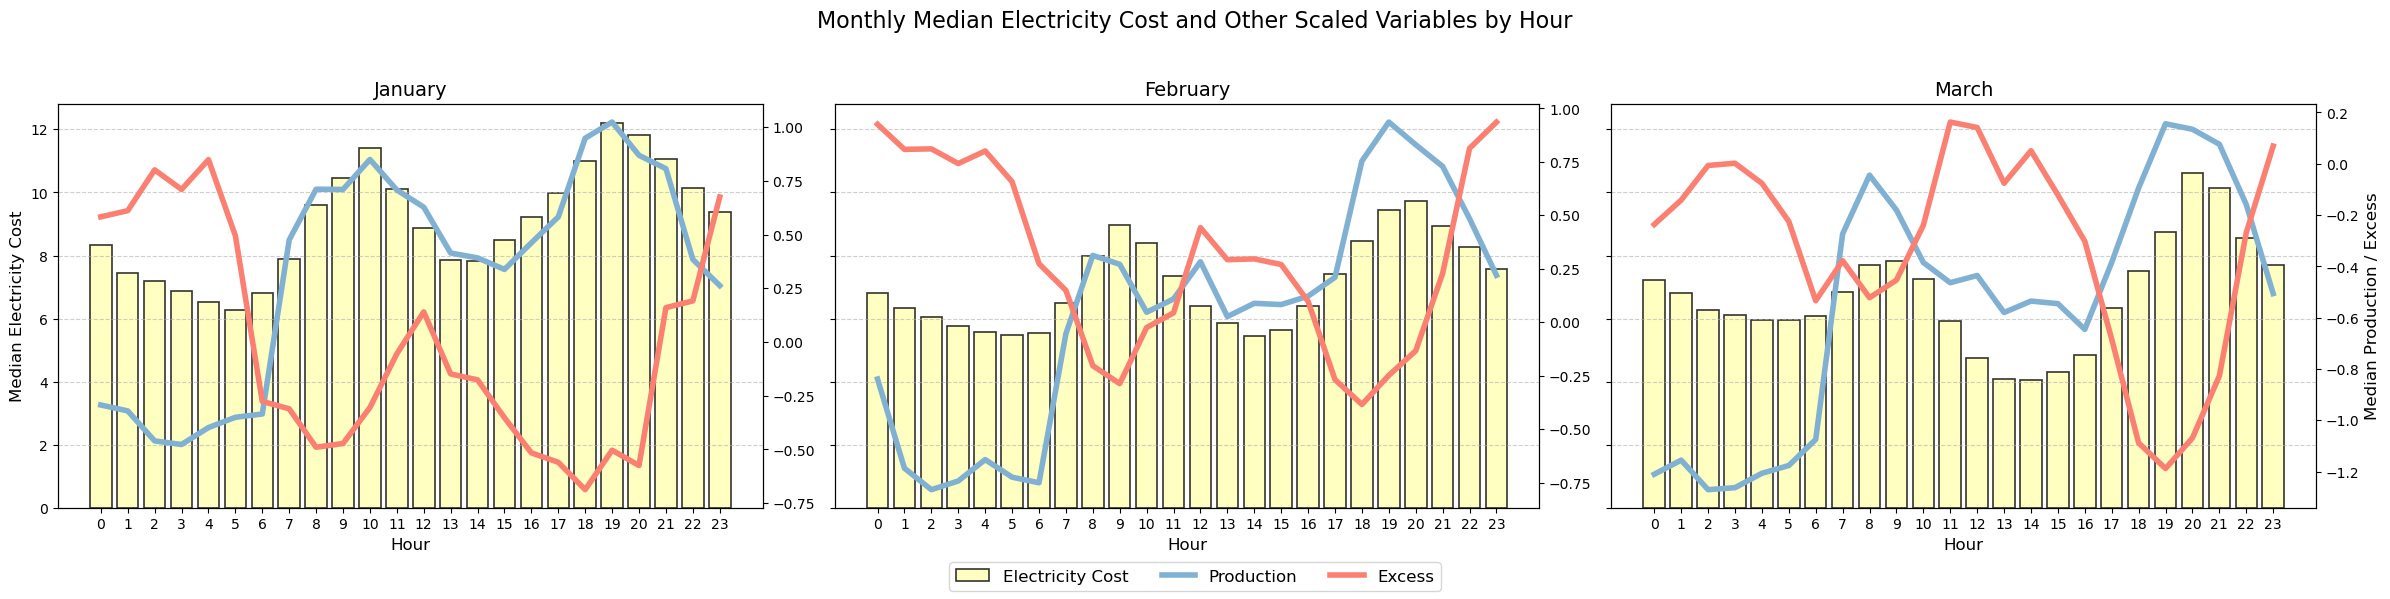

In [15]:
# Calculate the median values by month and hour for each variable
ckwh_sc = df_scale_2.groupby(['month', 'hour'])['ckwh'].median()
production_sc = df_scale_2.groupby(['month', 'hour'])['production'].median()
excess_sc = df_scale_2.groupby(['month', 'hour'])['excess'].median()

# Define the months for the subplots
month_dict = {1: 'January', 2: 'February', 3: 'March'}

# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(24, 6), sharey=True)

# Loop through each month to create a subplot
for i, (month_num, month_name) in enumerate(month_dict.items()):
    # Filter data for the specific month
    ckwh_by_hour = ckwh_sc.loc[month_num].values
    production_by_hour = production_sc.loc[month_num].values
    excess_by_hour = excess_sc.loc[month_num].values

    hours = ckwh_sc.loc[month_num].index

    # Plot the bar chart for median electricity cost
    bars = axes[i].bar(hours
                       , ckwh_by_hour
                       , color = colord[1]
                       , alpha = 0.8
                       , label = 'Electricity Cost'
                       , edgecolor = 'black'
                       , linewidth = 1.2
                      )
    
    axes[i].set_title(month_name, fontsize = 14)
    axes[i].set_xlabel('Hour', fontsize = 12)
    if i == 0:
        axes[i].set_ylabel('Median Electricity Cost', fontsize = 12)
    axes[i].set_xticks(range(0, 24))
    axes[i].grid(axis = 'y', linestyle ='--', alpha = 0.6)

    # Create the second y-axis to plot the other variables
    ax2 = axes[i].twinx()
    production_line, = ax2.plot(hours, production_by_hour, color = colord[4], label = 'Production', linewidth = 4)
    excess_line, = ax2.plot(hours, excess_by_hour, color = colord[3], label = 'Excess', linewidth = 4)
    if i == len(month_dict) - 1:
        ax2.set_ylabel('Median Production / Excess', fontsize = 12)

# Legend
lines = [bars, production_line, excess_line]
labels = [line.get_label() for line in lines]
fig.legend(lines, labels, loc='lower center', ncol = 3, fontsize = 12)

# Title
fig.suptitle('Monthly Median Electricity Cost and Other Scaled Variables by Hour', fontsize = 16)

# Adjust layout
plt.tight_layout(rect=[0, 0.05, 1, 0.95])

# Save the figure
plt.savefig('../image/ec_var.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()